# Preparation et chargement du corpus

In [2]:
from pathlib import Path
import re


data_dir = Path("../../data/txt")

all_txt = list(data_dir.glob("*.txt"))

YEAR = "1950"
pat = re.compile(rf"{YEAR}")

files_year = [p for p in all_txt if pat.search(p.name)]
print(f"Fichiers trouvés pour {YEAR}: {len(files_year)}")

corpus_year = ""
for path in files_year:
    for enc in ("utf-8", "latin-1", "cp1252"):
        try:
            with open(path, "r", encoding=enc, errors="ignore") as f:
                corpus_year += f.read() + "\n"
            break
        except Exception:
            continue

print(f"Taille du corpus {YEAR}: {len(corpus_year):,} caractères")
print("\nExtrait:\n", corpus_year[:500])

Fichiers trouvés pour 1950: 4
Taille du corpus 1950: 133,895 caractères

Extrait:
 L'AVENIR DU LUXEMBOURG Samedi 15 avri j 350, 
MORHET 
Soirée dramatique 
1 Le cercle dramatique Sainte-Cécile 
de Morhet reprendra, ce dimanche 16 
avril ^Quasimodo), sa brillante soirée 
qui a remporté un succès si remarqua-
| bie le 10 mars dernier. 
i Rappelons ie programme : 
; 1) ouverture : « Brabançonne »,par 
• la Fantare ; 2) « La .bohème », chœur 
à 2 voix exécuté par JV^.es Renée Cara, 
j Josée Goffin, Anyse Hubermont et Hé-
f lène Bellanger ; a) La comédie en deux 
actes de Marcell* 


# Nuages de mots

## Imports et stopwords

In [9]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to C:\Users\Ing Armel
[nltk_data]     Fopa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "journal", "édition", 
       "bruxelles", "belgique", "numéro", "année", "article", "soir", "camille"]
sw = set(sw)

print(f"Nombre total de stopwords: {len(sw)}")

Nombre total de stopwords: 209


Nettoyage léger du texte (Préparation WordCloud)

In [5]:
cleaned = re.sub(r"[^a-zA-ZÀ-ÖØ-öø-ÿ' -]", "", corpus_year).lower()
cleaned = re.sub(r"\s+", "", cleaned).strip()

len(cleaned)

95481

Génération du nuage de mots

In [11]:
wc = WordCloud(width=1200, height=600,
               background_color="white",
               stopwords=sw,
               collocations=False).generate(cleaned)

Affichage de nuage de mots

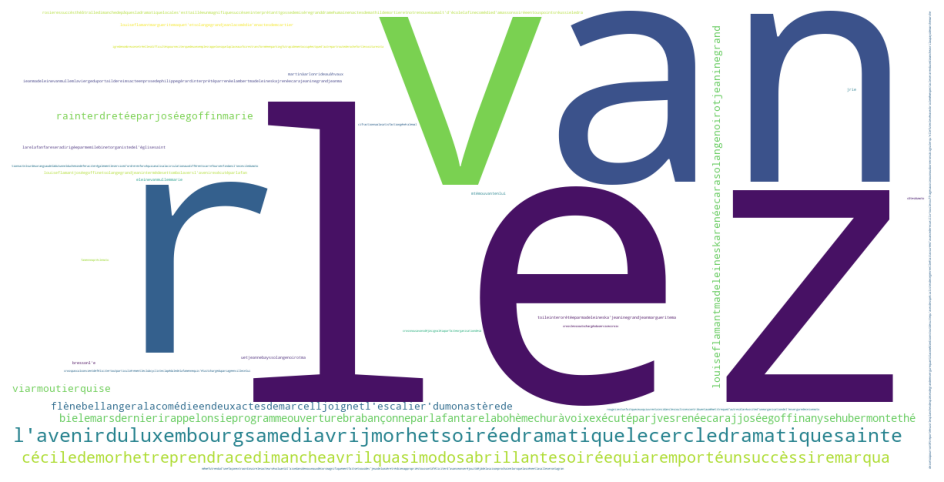

In [12]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

Sauvegarde du nuage de mots

In [13]:
wc.to_file("../data/wordcloud_1950.png")